<a href="https://colab.research.google.com/github/Jae15/ETL-SCD-using-DBT-Snowflake/blob/main/ai_impact_jobs_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Track and analyze news sentiment about how AI is impacting careers in software development, data analysis, and data science in 2025. Visualize trends, identify key drivers (entities: companies, job titles), and show how the narrative is evolving over time.

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Environment Setup


In [31]:
!pip install gnews pandas


# Python Script to Collect Targeted News Headlines


In [32]:
from gnews import GNews
import pandas as pd

# Initialize GNews (English, US, past 7 days, max 100 results per query)
google_news = GNews(language='en', country='US', period='7d', max_results=100)

# Keywords: AI impact on software/data jobs
search_terms = [
    "AI impact on software engineering jobs",
    "AI replacing programmers",
    "AI and data science jobs",
    "AI layoffs data analysts",
    "AI automation job market",
    "AI developer jobs 2025",
    "AI replacing data scientists"
]

# Collect news for each term
all_articles = []
for term in search_terms:
    articles = google_news.get_news(term)
    for article in articles:
        article['search_term'] = term
        all_articles.append(article)

# To DataFrame and CSV
df = pd.DataFrame(all_articles)
df.to_csv('ai_jobs_news_headlines.csv', index=False)

print("Scraped news headlines saved to ai_jobs_news_headlines.csv")
print(df.head())


Scraped news headlines saved to ai_jobs_news_headlines.csv
                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now - ...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025) - Explod...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now  B...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025)  Explodi...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Mon, 29 Sep 2025 19:04:00 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Tue, 30 Sep 2025 07:00:00 GMT   
4  Fri, 03 Oct 2025 07:00:00 GMT   

                                                 u

# Download the CSV from Colab

In [33]:
from google.colab import files
files.download('ai_jobs_news_headlines.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sentiment Analysis with VADER in Colab

In [34]:
import pandas as pd

# Load your data
df = pd.read_csv('ai_jobs_news_headlines.csv')

print("Original shape:", df.shape)
print(df.head())

# Drop duplicate headlines (if any)
df = df.drop_duplicates(subset='title')

# Remove rows without a headline
df = df[df['title'].notna()]

# (Optional) Further cleaning: Remove very short headlines or non-English
df = df[df['title'].str.len() > 20]

# Basic preprocessing: Remove extra whitespace
df['title'] = df['title'].str.strip()

print("Cleaned shape:", df.shape)
print(df.head())

# Save cleaned DataFrame (for the next step)
df.to_csv('ai_jobs_news_headlines_cleaned.csv', index=False)


Original shape: (282, 6)
                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now - ...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025) - Explod...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now  B...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025)  Explodi...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Mon, 29 Sep 2025 19:04:00 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Tue, 30 Sep 2025 07:00:00 GMT   
4  Fri, 03 Oct 2025 07:00:00 GMT   

                                                 url  \
0  https://news.google.com/r

In [35]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# Load cleaned headlines
df = pd.read_csv('ai_jobs_news_headlines_cleaned.csv')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each headline
df['compound'] = df['title'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(
    lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
)

# Show results
print(df[['title', 'sentiment', 'compound']].head())

# Save results for visualization/dashboard
df.to_csv('ai_jobs_news_headlines_sentiment.csv', index=False)


                                               title sentiment  compound
0  Evaluating the Impact of AI on the Labor Marke...   neutral     0.000
1  AI is transforming how software engineers do t...   neutral     0.000
2  New data show no AI jobs apocalypse—for now - ...  negative    -0.296
3  AI Engineer Career Guide: What They Do & How t...   neutral     0.000
4  60+ Stats On AI Replacing Jobs (2025) - Explod...   neutral     0.000


In [37]:
df = pd.read_csv('ai_jobs_news_headlines_sentiment.csv')
print(df.head())

                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now - ...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025) - Explod...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI is transforming how software engineers do t...   
2  New data show no AI jobs apocalypse—for now  B...   
3  AI Engineer Career Guide: What They Do & How t...   
4  60+ Stats On AI Replacing Jobs (2025)  Explodi...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Mon, 29 Sep 2025 19:04:00 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Tue, 30 Sep 2025 07:00:00 GMT   
4  Fri, 03 Oct 2025 07:00:00 GMT   

                                                 url  \
0  https://news.google.com/rss/articles/CBMilgFBV... 

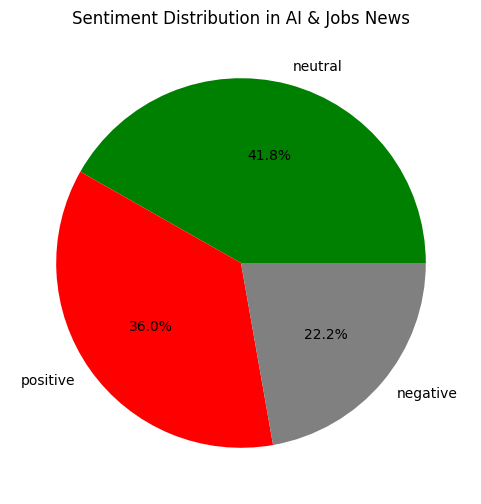

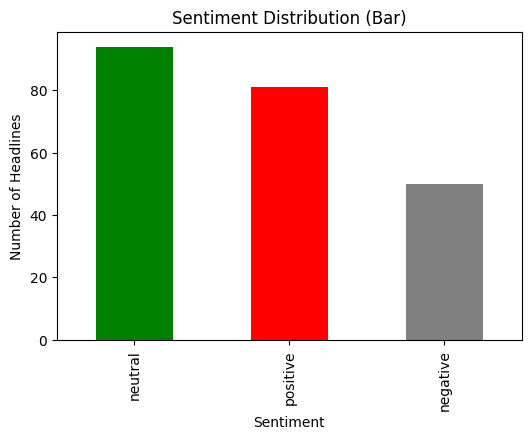

In [38]:
import matplotlib.pyplot as plt

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
colors = ['green', 'red', 'grey']
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution in AI & Jobs News')
plt.show()

# Bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution (Bar)')
plt.ylabel('Number of Headlines')
plt.xlabel('Sentiment')
plt.show()


In [39]:
import numpy as np

# Headline text length statistics
df['title_length'] = df['title'].str.len()
df['word_count'] = df['title'].str.split().map(len)
print("Headline length (mean, std):", df['title_length'].mean(), df['title_length'].std())
print("Word count (mean, std):", df['word_count'].mean(), df['word_count'].std())


Headline length (mean, std): 86.39111111111112 24.655445484993617
Word count (mean, std): 14.355555555555556 3.9672518575945355


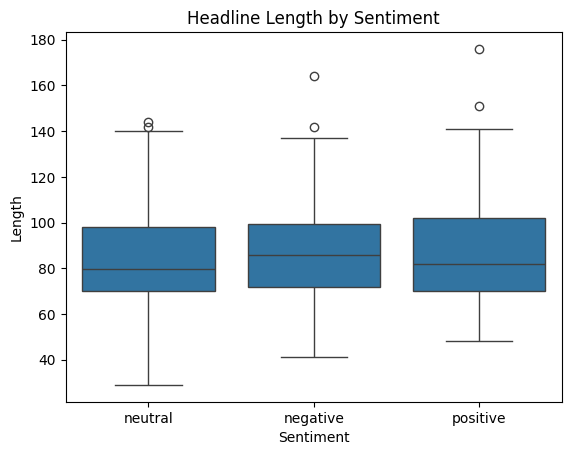

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment', y='title_length', data=df)
plt.title('Headline Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length')
plt.show()


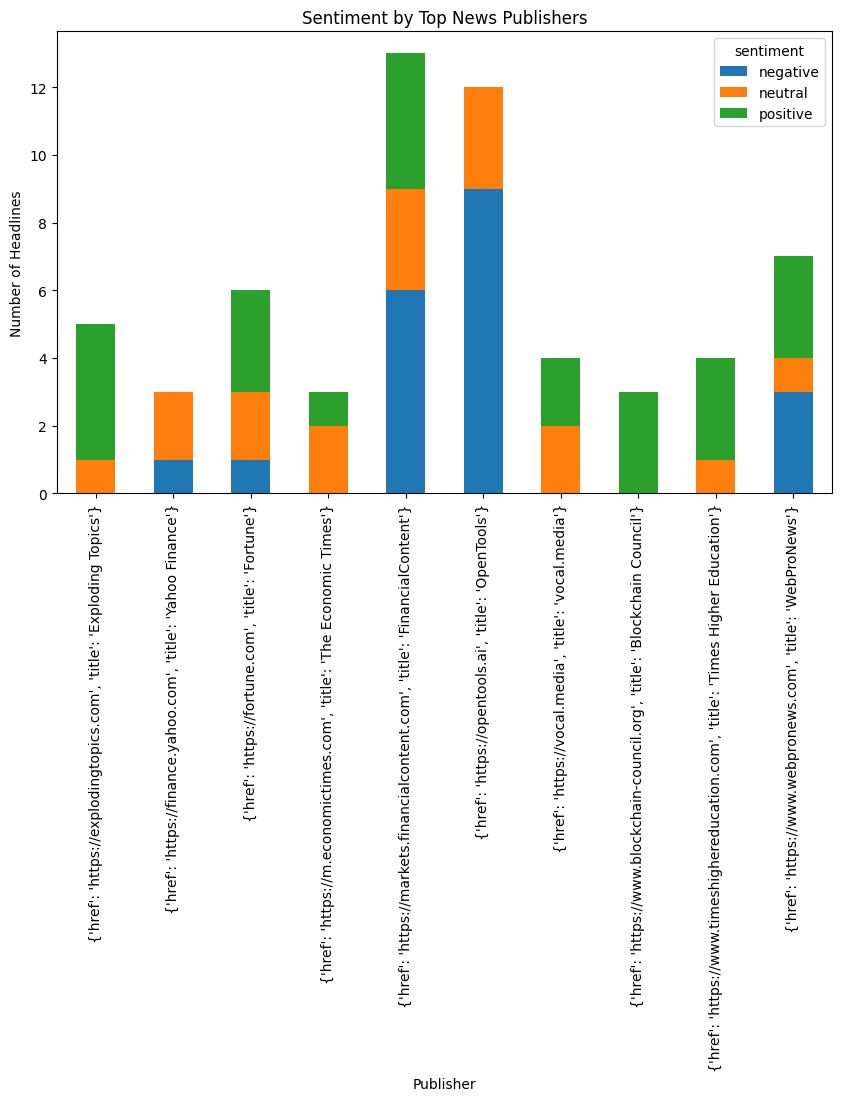

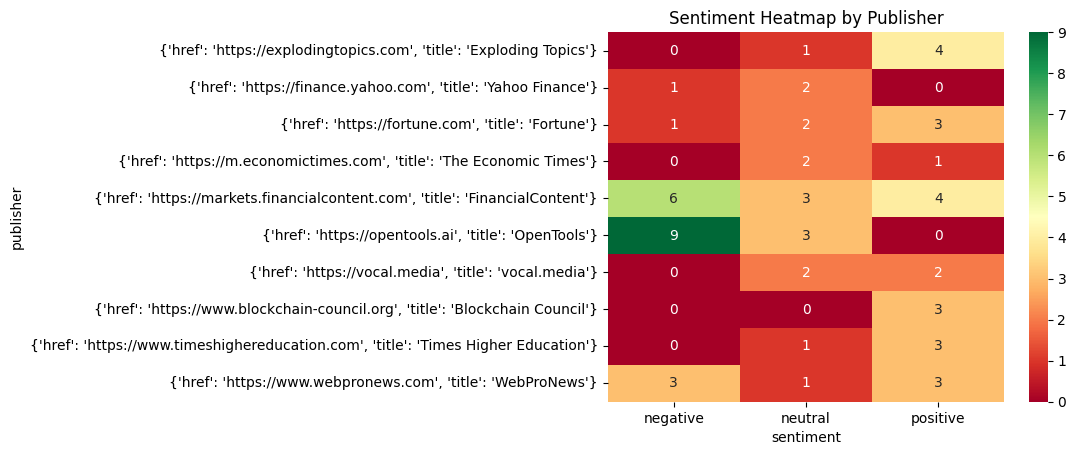

In [41]:
top_publishers = df['publisher'].value_counts().head(10).index
df_top = df[df['publisher'].isin(top_publishers)]
pivot = pd.pivot_table(df_top, index='publisher', columns='sentiment', values='title', aggfunc='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment by Top News Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Headlines')
plt.show()

# Or as heatmap for compact view
sns.heatmap(pivot, annot=True, cmap="RdYlGn")
plt.title('Sentiment Heatmap by Publisher')
plt.show()


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=100)
for sentiment in df['sentiment'].unique():
    texts = df[df['sentiment']==sentiment]['title'].astype(str)
    tfidf_matrix = tfidf.fit_transform(texts)
    scores = dict(zip(tfidf.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
    top_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Top TF-IDF keywords for {sentiment}:")
    print([w for w, _ in top_words])


Top TF-IDF keywords for neutral:
['ai', 'jobs', 'data', 'job', 'com', 'future', 'tech', 'new', 'yale', 'science']
Top TF-IDF keywords for negative:
['ai', 'jobs', 'job', 'market', 'tech', 'opentools', 'cuts', 'financialcontent', '000', '2025']
Top TF-IDF keywords for positive:
['ai', '2025', 'jobs', 'intelligence', 'job', 'tech', 'artificial', 'future', 'data', 'best']


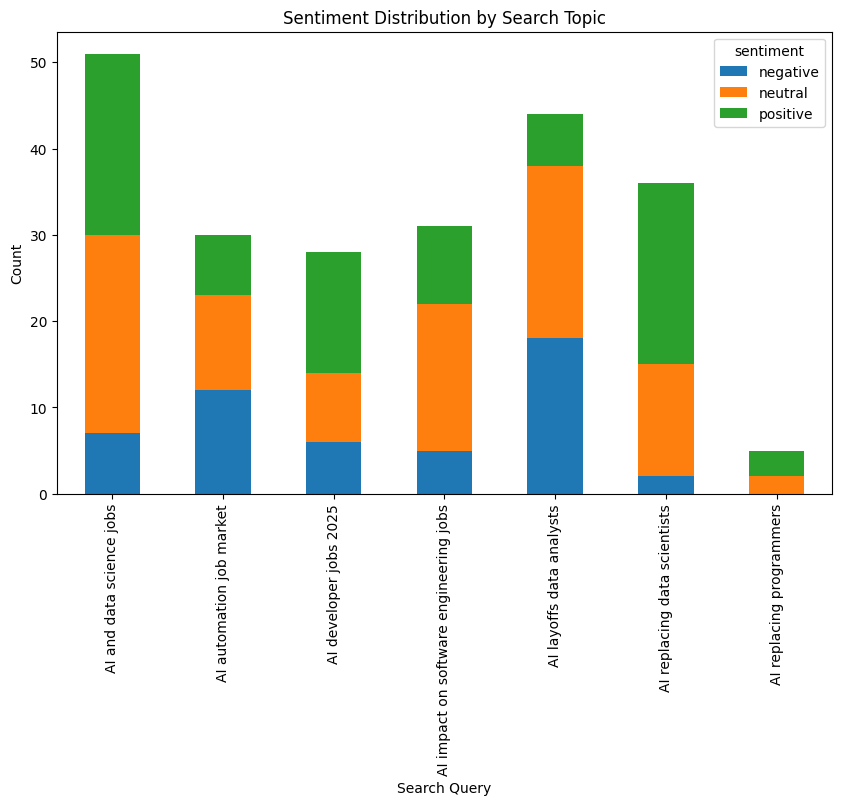

In [43]:
import matplotlib.pyplot as plt

topic_sentiment = pd.crosstab(df['search_term'], df['sentiment'])
topic_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution by Search Topic')
plt.xlabel('Search Query')
plt.ylabel('Count')
plt.show()


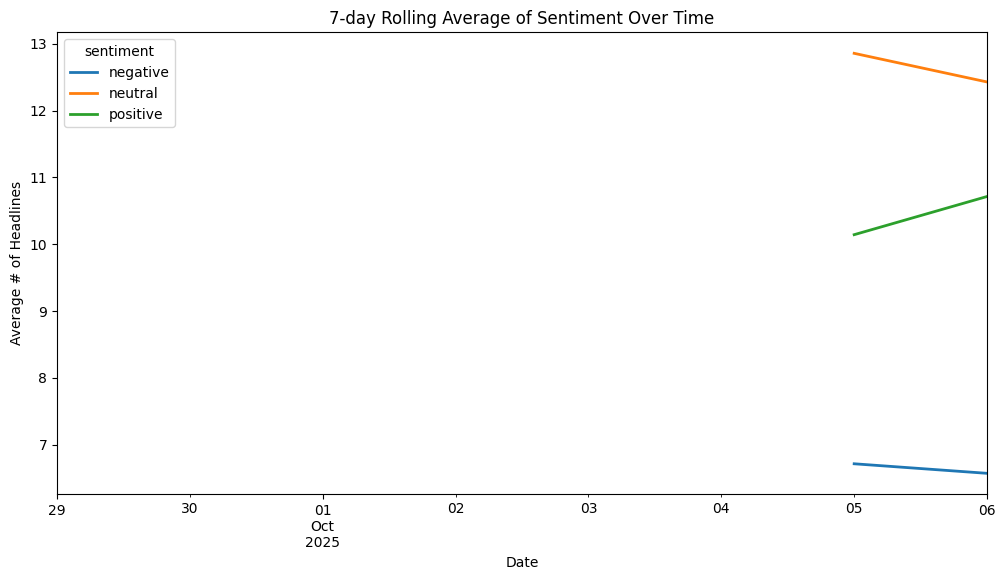

In [44]:
import matplotlib.pyplot as plt

if 'published date' in df.columns:
    # Convert 'published date' to datetime objects
    df['published date'] = pd.to_datetime(df['published date'], errors='coerce')

    # Drop rows where date conversion failed
    df.dropna(subset=['published date'], inplace=True)

    if not df.empty:
        daily_sentiment = df.set_index('published date').groupby('sentiment').resample('D').size().unstack(fill_value=0).T
        rolling = daily_sentiment.rolling(7).mean()
        rolling.plot(figsize=(12,6), linewidth=2)
        plt.title("7-day Rolling Average of Sentiment Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average # of Headlines")
        plt.show()
    else:
        print("No valid dates to plot sentiment over time.")

In [45]:
import scipy.stats as stats

# Example: sentiment vs. top publisher
top_publisher_subset = df[df['publisher'].isin(top_publishers)]
contingency = pd.crosstab(top_publisher_subset['publisher'], top_publisher_subset['sentiment'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f'Chi-square test p-value for sentiment distribution by publisher: {p:.4f}')


Chi-square test p-value for sentiment distribution by publisher: 0.0198


# Compound Sentiment by Search Term

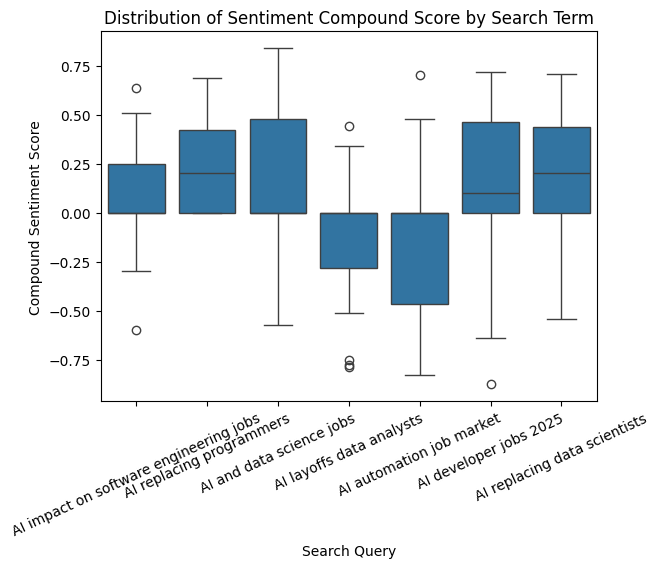

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='search_term', y='compound', data=df)
plt.title("Distribution of Sentiment Compound Score by Search Term")
plt.ylabel("Compound Sentiment Score")
plt.xlabel("Search Query")
plt.xticks(rotation=25)
plt.show()


# Top Entities Mentioned (Companies, Job Titles, Tech Terms)

In [47]:
!pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")

entities_list = []
for text in df['title']:
    doc = nlp(str(text))
    entities_list.extend([ent.text for ent in doc.ents if ent.label_ in ['ORG', 'PERSON', 'GPE', 'JOB']])

from collections import Counter
top_entities = Counter(entities_list).most_common(15)
print("Top mentioned entities:", top_entities)


Top mentioned entities: [('AI', 62), ('Yale', 7), ('US', 6), ('Nasdaq', 3), ('California', 3), ('India', 3), ('Netflix', 2), ('Morgan Stanley’s Tech Boss', 2), ('Silicon Republic', 2), ('Dow', 2), ('OpenAI', 2), ('Code.org', 2), ('the Center for Interdisciplinary Data Science and Artificial Intelligence - Times Higher', 2), ('PAYC', 2), ('Doug McMillon', 2)]


# Sentiment for Top Entities

In [48]:
entity = "OpenAI"  # Try with any top company or person
df_entity = df[df['title'].str.contains(entity, case=False, na=False)]
display(df_entity['sentiment'].value_counts())


,count
sentiment,
neutral,1
positive,1


#  Regression: What Drives More Negative Headlines?

In [49]:
import statsmodels.api as sm

# Simple regression: compound on headline length
X = df[['word_count']]
X = sm.add_constant(X)
y = df['compound']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.08956
Date:                Mon, 06 Oct 2025   Prob (F-statistic):              0.765
Time:                        13:54:08   Log-Likelihood:                -81.423
No. Observations:                 225   AIC:                             166.8
Df Residuals:                     223   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0820      0.088      0.936      0.3

#  Rolling or Cumulative Sentiment Average

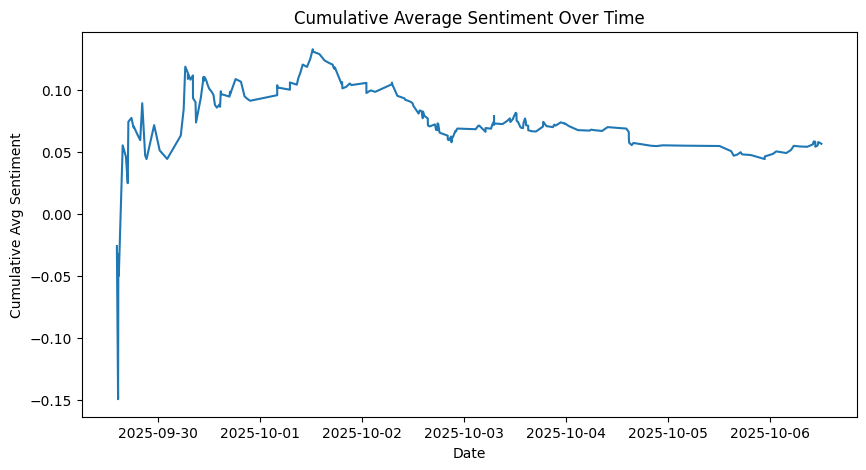

In [50]:
if 'published date' in df.columns:
    df_sorted = df.sort_values('published date')
    df_sorted['cumavg'] = df_sorted['compound'].expanding().mean()
    plt.figure(figsize=(10,5))
    plt.plot(df_sorted['published date'], df_sorted['cumavg'])
    plt.title('Cumulative Average Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Avg Sentiment')
    plt.show()


# Correlation Matrix (Numeric Features)

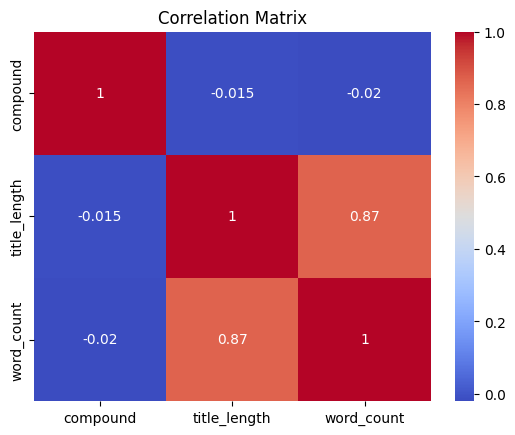

In [51]:
import numpy as np

numeric_cols = ['compound', 'title_length', 'word_count']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Interactive Plot with Plotly

In [52]:
import plotly.express as px
fig = px.scatter(df, x='word_count', y='compound', hover_data=['title'], color='sentiment',
                 title='Headline Length vs Sentiment')
fig.show()


In [53]:
code = '''

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set page configuration
st.set_page_config(page_title="AI & Tech Careers: News Sentiment", layout="wide")

# Title and Intro
st.title("AI & Tech Careers: News Sentiment Dashboard (2025)")
st.write(
    "An interactive dashboard analyzing recent news sentiment about the impact of AI on software and data jobs. "
    "Data is automatically scraped and classified for sentiment (positive/neutral/negative)."
)

# Load the data
@st.cache_data
def load_data():
    return pd.read_csv('ai_jobs_news_headlines_sentiment.csv')

df = load_data()

# Show headline count
st.subheader("Key Stats")
col1, col2, col3, col4 = st.columns(4)
col1.metric("Total Headlines", len(df))
col2.metric("Positive", (df['sentiment']=="positive").sum())
col3.metric("Negative", (df['sentiment']=="negative").sum())
col4.metric("Neutral", (df['sentiment']=="neutral").sum())

# Sentiment distribution bar chart
st.subheader("Sentiment Distribution")
sentiment_counts = df['sentiment'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,
            palette={"positive":"green", "negative":"red", "neutral":"gray"}, ax=ax)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Headlines")
st.pyplot(fig)

# Explore by search term or publisher
st.subheader("Explore Headlines")
with st.expander("Filter by"):
    filter_by = st.selectbox("Select filter:", ("search_term", "publisher"))
    options = df[filter_by].dropna().unique()
    selected = st.multiselect(f"Choose {filter_by}(s):", options, default=options[:1])
    filtered = df[df[filter_by].isin(selected)]

if filtered.empty:
    st.write("No results for this selection.")
else:
    st.write(filtered[['title', 'sentiment', 'published date', 'publisher']].head(20))

# Sentiment over time (using the actual date column from your data)
if 'published date' in df.columns:
    st.subheader("Sentiment Trends Over Time")
    df['published date'] = pd.to_datetime(df['published date'], errors='coerce')
    daily = df.groupby([pd.Grouper(key='published date', freq='D'),'sentiment']).size().unstack(fill_value=0)
    fig2, ax2 = plt.subplots()
    daily.plot(ax=ax2)
    ax2.set_ylabel("Number of Headlines")
    ax2.set_title("Sentiment by Day")
    st.pyplot(fig2)

# Compound score distribution
st.subheader("Compound Sentiment Score Distribution")
fig3, ax3 = plt.subplots()
df.hist('compound', bins=30, ax=ax3)
ax3.set_xlabel("Compound Sentiment Score")
ax3.set_ylabel("Frequency")
ax3.set_title("Distribution of VADER Compound Scores")
st.pyplot(fig3)

st.markdown("---")
st.write("Built with Python, pandas, NLTK VADER, matplotlib, seaborn, and Streamlit.")
'''

with open('streamlit_app.py', 'w') as f:
    f.write(code)


In [54]:
from google.colab import files
files.download('streamlit_app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
requirements = '''
streamlit
pandas
matplotlib
seaborn
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)


In [56]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
!git remote -v


fatal: not a git repository (or any of the parent directories): .git
